Enter Assignment Topic Data Science
Enter Your Roll Number (press 'q' to quit): 1
Enter your Name: Ajay
Enter Assignment:  Data science is an interdisciplinary academic field[1] that uses statistics, scientific computing, # scientific methods, processing, scientific visualization, algorithms and systems to extract or extrapolate knowledge # and insights from potentially noisy, structured, or unstructured data. # Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, # information technology, and medicine).Data science is multifaceted and can be described as a science, a research # paradigm, a research method, a discipline, a workflow, and a profession. # Data science is "a concept to unify statistics, data analysis, informatics, and their related # methods" to "understand and analyze actual phenomena" with data.It uses techniques and theories drawn from # many fields within the context of mathematics, statistics, computer science, 

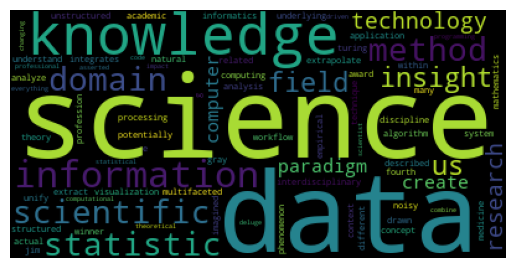

,Roll Number,Name,Assignment,Grade
0,1,Ajay,Data science is an interdisciplinary academic ...,4


In [54]:
import re
import nltk
import requests
import warnings 
import pandas as pd
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()
tdf=TfidfVectorizer()
wl=WordNetLemmatizer()
warnings.filterwarnings('ignore')
stop_words=set(stopwords.words('English'))

def get_des(topic):
    search_url = f"https://en.wikipedia.org/wiki/{topic.replace(' ', '_')}"
    response = requests.get(search_url)
    soup = BeautifulSoup(response.content, 'html.parser')

    paragraphs = soup.find_all('p')
    if paragraphs:
        x =' '.join([para.get_text() for para in paragraphs[:5]])
    else:
        return "No description found."

    return x

topic = input('Enter Assignment Topic')
z = get_des(topic)
# print(f"Brief Description of {topic}: {d}")

a=nltk.sent_tokenize(z)
b=[]
for i in range(len(a)):
    space=re.sub('[^a-zA-z]',' ',a[i]).lower()
    split=space.split()
    words=[wl.lemmatize(j) for j in split if j not in stop_words]
    split=' '.join(words)
    b.append(split)
b=str(b)
c=re.sub('[^a-zA-Z]',' ',b)
d=re.sub('\s+',' ',c)

assignments=[]
while True:
    roll_no=input("Enter Your Roll Number (press 'q' to quit):")
    if roll_no.lower()=='q':
        break
    try:
        roll_no=int(roll_no)
    except ValueError:
        print('Invalid Roll Number')
        continue

    name=input("Enter your Name:")
    student_assignment=input('Enter Assignment: ')
    stu_ass_low= student_assignment.lower()
    student_words=set([wl.lemmatize(word) for word in nltk.word_tokenize(stu_ass_low) if word.lower() not in stop_words])

    docs=([d]+list(student_words))
    tfid=tdf.fit_transform(docs)
    cos_sim=cosine_similarity(tfid[0:1],tfid[1:])
    # cvf=cv.fit_transform(docs).toarray()
    # cos_sim=cosine_similarity(cvf[0:1],cvf[1:])
    #print(cos_sim)
    mark=int(cos_sim[0][0]*100)
    if cos_sim[0][0]>0:
        grade=mark
    else:
        grade='Fail'

    student_data= {
    'Roll Number':roll_no,
    'Name':name,
    'Assignment':student_assignment,
    'Grade':grade
    }
    assignments.append(student_data)

data=pd.DataFrame(assignments)
data.to_csv('Student_Assignment_Results.csv',index=False)
wordcloud=WordCloud().generate(d)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
data

COSINE SIMILARITY

BEAUTIFUL SOUP